# Creación dst y src idx

Importaciones y visualización

In [2]:
from ase.io import read
from ase.visualize import view
from scipy import sparse
from ase.build import molecule
from ase.neighborlist import get_connectivity_matrix
from ase.neighborlist import natural_cutoffs
from ase.neighborlist import NeighborList
import scipy.sparse
import itertools

graphene = read('geometry100.in')
view(graphene, viewer='x3d')

### Información del graphene

In [3]:
print("\nNúmero de átomos:", len(graphene))
print("\nSímbolos de los átomos:", graphene.get_chemical_symbols())
print("\nPosiciones de los átomos:\n", graphene.get_positions())


Número de átomos: 98

Símbolos de los átomos: ['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']

Posiciones de los átomos:
 [[-7.8600000e-03 -8.4140000e-03  2.8800000e-04]
 [ 1.2222860e+00  7.0220900e-01 -1.1800000e-04]
 [ 1.2212900e+00  2.1224790e+00  4.9900000e-04]
 [ 2.4521420e+00  2.8331030e+00  2.3130000e-03]
 [ 2.4517430e+00  4.2547390e+00  3.9840000e-03]
 [ 3.6796630e+00  4.9656220e+00  4.4930000e-03]
 [ 3.6794510e+00  6.3910510e+00  6.2420000e-03]
 [ 4.9087000e+00  7.1051160e+00  7.2520000e-03]
 [ 4.9125660e+00  8.5267020e+00  8.8580000e-03]
 [

In [4]:
# Calculo de radios de corte naturales
cutoffs = natural_cutoffs(graphene)
print('Los radios de corte naturales son:', cutoffs)
print(len(cutoffs))

#Listas de vecinos con radios de corte naturales
neighbor_list = NeighborList(cutoffs, self_interaction=False, bothways=True)
neighbor_list.update(graphene)

Los radios de corte naturales son: [0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76, 0.76]
98


True

In [5]:
# Matriz de conexiones entre átomos
matrix_graph_sparse = neighbor_list.get_connectivity_matrix()
print(matrix_graph_sparse)

  (0, 85)	1
  (0, 1)	1
  (0, 13)	1
  (1, 2)	1
  (1, 0)	1
  (1, 14)	1
  (2, 87)	1
  (2, 1)	1
  (2, 3)	1
  (3, 16)	1
  (3, 4)	1
  (3, 2)	1
  (4, 89)	1
  (4, 3)	1
  (4, 5)	1
  (5, 18)	1
  (5, 4)	1
  (5, 6)	1
  (6, 91)	1
  (6, 5)	1
  (6, 7)	1
  (7, 20)	1
  (7, 8)	1
  (7, 6)	1
  (8, 93)	1
  :	:
  (89, 88)	1
  (90, 91)	1
  (90, 77)	1
  (90, 89)	1
  (91, 92)	1
  (91, 6)	1
  (91, 90)	1
  (92, 93)	1
  (92, 79)	1
  (92, 91)	1
  (93, 94)	1
  (93, 8)	1
  (93, 92)	1
  (94, 95)	1
  (94, 81)	1
  (94, 93)	1
  (95, 96)	1
  (95, 10)	1
  (95, 94)	1
  (96, 97)	1
  (96, 83)	1
  (96, 95)	1
  (97, 12)	1
  (97, 84)	1
  (97, 96)	1


In [8]:
# Matriz dispersa a matriz densa
matrix_graph_dense = scipy.sparse.csr_matrix.todense(matrix_graph_sparse)
# Impresión de los vecinos del átomo 1 (prueba)
print(matrix_graph_dense[0])
print(matrix_graph_dense.shape)
# Checar dimensiones de la matriz del átomo 0 (prueba)
mp = matrix_graph_dense[0]
print(mp.shape)

[[0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]]
(98, 98)
(1, 98)


## Dibujo de la Matriz de adyacencia  

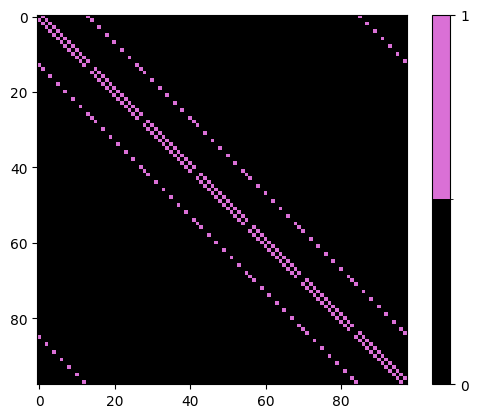

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Mapa de colores
cmap = mcolors.ListedColormap(['black', 'orchid'])
bounds = [0, 0.5, 1]
norm = mcolors.BoundaryNorm(bounds, cmap.N)
fig, ax = plt.subplots()

# Grafico de matriz con imshow
cax = ax.imshow(matrix_graph_dense, cmap=cmap, norm=norm)

# barra de colores
cbar = fig.colorbar(cax, ticks=[0, 1])
cbar.ax.set_yticklabels(['0', '1'])

plt.show()

In [11]:
# Revisión de notación
print(mp[0,:])

[[0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]]


In [12]:
#Comprensión de listas para saber las etiquetas de los vecinos
nbrs = [i for i in range(len(matrix_graph_dense[:][:])) if matrix_graph_dense[0,i] == 1]
print(nbrs)

[1, 13, 85]


In [15]:
# Creación de una lista con las etiquetas de los vecinos de cada átomo
nbrs_total =[]
j = 0
for j in range(len(matrix_graph_dense[:][:])):
    nbrs=[]
    nbrs = [i for i in range(len(matrix_graph_dense[:][:])) if matrix_graph_dense[j,i] == 1]
    nbrs_total.append(nbrs)
    j+=1

print(nbrs_total)
print(len(nbrs_total))

[[1, 13, 85], [0, 2, 14], [1, 3, 87], [2, 4, 16], [3, 5, 89], [4, 6, 18], [5, 7, 91], [6, 8, 20], [7, 9, 93], [8, 10, 22], [9, 11, 95], [10, 12, 24], [11, 13, 97], [0, 12, 26], [1, 15, 27], [14, 16, 28], [3, 15, 17], [16, 18, 30], [5, 17, 19], [18, 20, 32], [7, 19, 21], [20, 22, 34], [9, 21, 23], [22, 24, 36], [11, 23, 25], [24, 26, 38], [13, 25, 27], [14, 26, 40], [15, 29, 41], [28, 30, 42], [17, 29, 31], [30, 32, 44], [19, 31, 33], [32, 34, 46], [21, 33, 35], [34, 36, 48], [23, 35, 37], [36, 38, 50], [25, 37, 39], [38, 40, 52], [27, 39, 41], [28, 40, 54], [29, 43, 55], [42, 44, 56], [31, 43, 45], [44, 46, 58], [33, 45, 47], [46, 48, 60], [35, 47, 49], [48, 50, 62], [37, 49, 51], [50, 52, 64], [39, 51, 53], [52, 54, 66], [41, 53, 55], [42, 54, 68], [43, 57, 69], [56, 58, 70], [45, 57, 59], [58, 60, 72], [47, 59, 61], [60, 62, 74], [49, 61, 63], [62, 64, 76], [51, 63, 65], [64, 66, 78], [53, 65, 67], [66, 68, 80], [55, 67, 69], [56, 68, 82], [57, 71, 83], [70, 72, 84], [59, 71, 73], [7

In [16]:
# Construcción final de dst_idx
dst_idx = []
for j in range(len(nbrs_total)):
    prueba_cl = [j for i in range(len(nbrs_total[j]))]
    dst_idx.append(prueba_cl)

dst_idx = list(itertools.chain(*dst_idx))
print(dst_idx)
print(len(dst_idx))

print(98*3)

[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22, 22, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 26, 27, 27, 27, 28, 28, 28, 29, 29, 29, 30, 30, 30, 31, 31, 31, 32, 32, 32, 33, 33, 33, 34, 34, 34, 35, 35, 35, 36, 36, 36, 37, 37, 37, 38, 38, 38, 39, 39, 39, 40, 40, 40, 41, 41, 41, 42, 42, 42, 43, 43, 43, 44, 44, 44, 45, 45, 45, 46, 46, 46, 47, 47, 47, 48, 48, 48, 49, 49, 49, 50, 50, 50, 51, 51, 51, 52, 52, 52, 53, 53, 53, 54, 54, 54, 55, 55, 55, 56, 56, 56, 57, 57, 57, 58, 58, 58, 59, 59, 59, 60, 60, 60, 61, 61, 61, 62, 62, 62, 63, 63, 63, 64, 64, 64, 65, 65, 65, 66, 66, 66, 67, 67, 67, 68, 68, 68, 69, 69, 69, 70, 70, 70, 71, 71, 71, 72, 72, 72, 73, 73, 73, 74, 74, 74, 75, 75, 75, 76, 76, 76, 77, 77, 77, 78, 78, 78, 79, 79, 79, 80, 80, 80, 81, 81, 81, 82, 82, 82, 83, 83, 83, 84, 84, 84, 85, 85, 8

In [17]:
# Construcción final de src_idx
src_idx = list(itertools.chain(*nbrs_total))
print(src_idx)
print(len(src_idx))

[1, 13, 85, 0, 2, 14, 1, 3, 87, 2, 4, 16, 3, 5, 89, 4, 6, 18, 5, 7, 91, 6, 8, 20, 7, 9, 93, 8, 10, 22, 9, 11, 95, 10, 12, 24, 11, 13, 97, 0, 12, 26, 1, 15, 27, 14, 16, 28, 3, 15, 17, 16, 18, 30, 5, 17, 19, 18, 20, 32, 7, 19, 21, 20, 22, 34, 9, 21, 23, 22, 24, 36, 11, 23, 25, 24, 26, 38, 13, 25, 27, 14, 26, 40, 15, 29, 41, 28, 30, 42, 17, 29, 31, 30, 32, 44, 19, 31, 33, 32, 34, 46, 21, 33, 35, 34, 36, 48, 23, 35, 37, 36, 38, 50, 25, 37, 39, 38, 40, 52, 27, 39, 41, 28, 40, 54, 29, 43, 55, 42, 44, 56, 31, 43, 45, 44, 46, 58, 33, 45, 47, 46, 48, 60, 35, 47, 49, 48, 50, 62, 37, 49, 51, 50, 52, 64, 39, 51, 53, 52, 54, 66, 41, 53, 55, 42, 54, 68, 43, 57, 69, 56, 58, 70, 45, 57, 59, 58, 60, 72, 47, 59, 61, 60, 62, 74, 49, 61, 63, 62, 64, 76, 51, 63, 65, 64, 66, 78, 53, 65, 67, 66, 68, 80, 55, 67, 69, 56, 68, 82, 57, 71, 83, 70, 72, 84, 59, 71, 73, 72, 74, 86, 61, 73, 75, 74, 76, 88, 63, 75, 77, 76, 78, 90, 65, 77, 79, 78, 80, 92, 67, 79, 81, 80, 82, 94, 69, 81, 83, 70, 82, 96, 71, 85, 97, 0, 8

In [18]:
print(type(dst_idx))

dst_idx = np.array([dst_idx])

print(type(dst_idx))

<class 'list'>
<class 'numpy.ndarray'>
